## Chapter 3 평가

앞에서는 모델 예측 성능의 평가를 위해 정확도(Accuracy)를 이용했다. 하지만 이 밖에도 여러 가지 방법으로 예측 성능을 평가할 수 있다. <br/> 성능 평가 모델은 일반적으로 모델이 분류냐 회귀냐에 따라 다르다. <br/> 분류의 성능 평가 지표는 다음과 같다.
- 정확도(Accuracy)
- 오차행렬(Confusion Matrix0
- 정밀도(Precision)
- 재현율(Recall)
- F1 스코어
- ROC AUC

분류의 경우 결정 클래스 값 종류의 유형에 따라 이진 분류와 선택 분류로 나뉠 수 있다. 위의 지표들은 모두 적용되는 지표이지만  특히 이진 분류에서 더욱 중요하게 강조하는 지표이다.

### 1. 정확도(Accuracy)

정확도는 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표이며 전체 예측 데이터 건수에서 예측 결과가 동일한 데이터 건수의 비율이다. 직관적으로 모델 예측 성능을 나타낸다. 하지만 불균형한 데이터에 의한 정확도의 착시 현상에 속지 않도록, 특히 이진 판단일 경우 주의해야 한다.

### 2. 오차 행렬

이진 분류에서 성능 지표로 잘 활용되는 오차 행렬(confusion matrix, 혼동행렬)은 학습된 분류 모델이 예측을 수행하면성 얼마나 핫갈려하는지도 함께 보여주는 지표이다.

![오차 행렬](./images/confusionMatrix.png)

위의 TN, FP, FN, TP로 각 4분면을 채우고 이를 다양하게 결합해 분류 모델 성능의 오류가 어떠한 모습으로 발생하는 지 알 수 있다. <br/> 사이킷런 역시 이를 위한 API를 제공한다.

```python
from sklearn.metricx import confusion_matrix

confusion_matrix(y_test, pred)
```

이렇게 하면 반환값으로 각 행렬에 위치하는 값의 수가 2차원 리스트로 반환된다.

### 3. 정밀도와 재현율

정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표이다.
- 정밀도 = TP / (FP + TP)
- 재현율 = TP / (FN + TP)

정밀도는 예측을 긍정으로 한 대상 중 실제 값이 긍정으로 일치한 데이터의 비율이다. <br/> 재현율은 실제 값이 긍정인 대상 중 예측과 실제 값이 긍정으로 일치한 데이터의 비율이다. <br/> 각각 업무 특성에 따라 특정 지표가 더 중요한 지표로 간주될 수 있다.

- 재현율이 더 중요한 경우 : 실제 긍정인 예측을 부정으로 잘못 판단하면 업무상 큰 영향을 끼치는 경우
- 정밀도가 더 중요한 경우 : 실제 부정인 예측을 긍정으로 잘못 판단하면 업무상 큰 영향을 끼치는 경우

In [1]:
# 오차 행렬 및 정밀도, 재현율을 모두 구하는 함수를 만들어보자.
# 사이킷런은 정밀도 계산을 위해 precision_score()를,
# 재현율 계산을 위해 recall_score()를 제공한다.

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [2]:
# 타이타닉 생존자 예측 후 위 함수를 실행시켜 보자.
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator

# 이전에 타이타닉 전처리때 만든 함수들
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 분할
titanic_df = pd.read_csv('./data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)


X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=0)


X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율: 0.7869


C:\Users\korea_1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### 정밀도/재현율 트레이드 오프

정밀도와 재현율은 상호 보완적인 평가지표이기 때문에 하나를 높이면 하나는 낮아지기 쉽다. 이런 사이를 trade off라고 한다. <br/><br/> 사이킷런의 분류 알고리즘은 예측 데이터가 특정 레이블에 속하는지를 계산하기 위해 먼저 개별 레이블별로 결정 확률을 구한다. 그리고 예측 확률이 큰 레이블값으로 예측하게 된다. 사이킷런은 개별 데이터별로 예측 확률을 반환하는 predict_proba()를 제공한다. 테스트 피처 데이터 세트를 파라미터로 입력하면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환한다.

In [3]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 shape : {0}'.format(pred_proba.shape))
print('pred_proba() array에서 앞 3개만 샘플로 추출 \n :', pred_proba[:3])

# 예측 확률 array와 예측 결과값 array를 병합(concatenate)해 예측 확률과 결과 값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])
print('0번째 칼럼이 0확률 1번째 칼럼이 1확률')

pred_proba() 결과 shape : (179, 2)
pred_proba() array에서 앞 3개만 샘플로 추출 
 : [[0.46170212 0.53829788]
 [0.87864222 0.12135778]
 [0.87728507 0.12271493]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46170212 0.53829788 1.        ]
 [0.87864222 0.12135778 0.        ]
 [0.87728507 0.12271493 0.        ]]
0번째 칼럼이 0확률 1번째 칼럼이 1확률


In [4]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

#### 정밀도와 재현율의 맹점

Positive 예측의 임곗값을 변경함에 따라 정밀도와 재현율의 수치가 변경된다. 임곗값의 이러한 변경은 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용되어야 한다. 하나만 극단적으로 높이면 안된다.

##### 정밀도 100%가 되는 방법

확실한 기준이 되는 경우만 긍정 예측, 나머지는 부정 예측 1000명 중 진짜 확실한 1명만 암환자 긍정 예측을 하고 나머진 다 부정 예측 시 100%

##### 재현율 100%가 되는 방법

모든 환자를 긍정 예측

### 4. F1 스코어

![f1score](./images/f1score.png)

F1 스코어는 정밀도와 재현율을 결합한 지표이다. 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가집니다.<br/> 사이킷런에서도 이를 위한 API를 제공한다.
```python
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어 : {0:.4f}'.format(f1))
```

### 5. ROC 곡선과 AUC

![roc](./images/ROC.png)

ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표이다. ROC 곡선은 우리말로 수신자 판단 곡선으로 불린다. <br/> ROC 곡선은 FPR(False Positive Rate)가 변할 때 TPR(True Positive Rate)가 어떻게 변하는지를 나타내는 곡선이다. FPR을  X축으로 TPR을 Y축으로 잡으면 FPR의 변화에 따른 TPR의 변화가 곡선 형태로 나타난다. <br/>TPR은 곧 재현율이다. 이는 곧 민감도로도 불리며 이에 대응하는 지표로 TNR(True Negative Rate)라고 불리는 특이성이 있다. 특이성은 다음과 같이 구할 수 있다. <br/><br/>FPR = FP / (FP + TN) = 1 - TNR = 1 - 특이성 <br/><br/> ROC 곡선은 직선에 가까울수록 성능이 떨어지는 것이며 멀어질수록 성능이 뛰어난 것이다. <br/> ROC 곡선은 FPR을 0부터 1까지 변경하면서 TPR의 변화 값을 구한다. FPR을 0부터 1까지 변경하는 방법은 분류 결정 임곗값을 변경하는 것이다. (predict 에서의) FPR을 0으로 만드려면 임곗값을 1로 지정하면 된다. 

In [5]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 Step으로 추출. 
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임곗값:  [0.97 0.65 0.63 0.57 0.45 0.38 0.31 0.13 0.12 0.11 0.1 ]
샘플 임곗값별 FPR:  [0.    0.017 0.034 0.076 0.127 0.186 0.237 0.576 0.619 0.754 0.814]
샘플 임곗값별 TPR:  [0.033 0.639 0.705 0.754 0.803 0.852 0.902 0.902 0.951 0.967 1.   ]


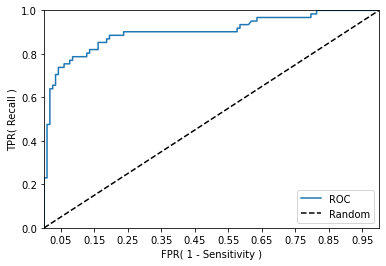

In [6]:
import matplotlib.pyplot as plt

def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

일반적으로 ROC 곡선 자체는 FPR과 TPR의 변화 값을 보는 데 이용하며 분류의 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC 값으로 결정한다. 이는 ROC 곡선 밑의 면적을 구한 것으로써 1에 가까울수록 좋은 수치이다. AUC 수치가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건이다.

In [7]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9024


In [8]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

### 6. 피마 인디언 당뇨병 예측

피마 인디언 당뇨병 데이터 세트를 이용해 당뇨병 여부를 판단하는 머신러닝 예측 모델을 만들고 지금까지 알아본 평가 지표를 적용해보자. <br/> 피처는 다음과 같다.

- Pregnancies : 임신 횟수
- Giucose : 포도당 부하 검사 수치
- BloodPressure : 혈압(mm Hg)
- SkinThickness : 팔 삼두근 뒤 쪽의 피하지방 측정값(mm)
- Insulin : 혈청 인슐린(mu U/ml)
- BMI : 체질량 지수
- DiabetesPedigreeFunction : 당뇨 내력 가중치 값
- Age : 나이
- Outcome : 클래스 결정 값 (0 또는 1)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('./data/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [10]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출. 
# 맨 끝이 Outcome 컬럼으로 레이블 값임. 컬럼 위치 -1을 이용해 추출 
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습,예측 및 평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)

오차 행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741,          F1: 0.6392, AUC:0.7919


C:\Users\korea_1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


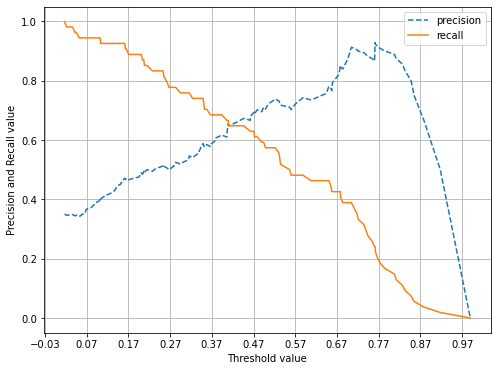

In [12]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [13]:
# 정밀도와 재현율이 비슷한 임곗값은 0.42쯤 하지만 둘 다 어느정도 낮다. (0.7)

diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

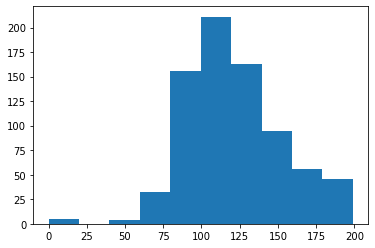

In [14]:
# min이 0으로 되어 있는 값들이 많다.
# 특히 포도당 수치인 'Gloucose'가 0인 것은 말이 되지 않는다.
plt.hist(diabetes_data['Glucose'], bins=10)

In [15]:
# min() 값이 0으로 되어 있는 피처에 대해 0 값의 건수 및 전체 데이터 건수 대비 몇 퍼센트의 비율로 존재하는지 확인하자.

# 0값을 검사할 피처명 리스트 객체 설정
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복 하면서 데이터 값이 0 인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [16]:
# SkinThickness와 Insulin은 0값의 비율이 너무 크다.
# 0값을 삭제하기는 힘들 것 같고 (전체 데이터 수가 적어서) 이를 평균값으로 대체하자.

# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0, diabetes_data[zero_features].mean())

In [17]:
# 여기에 이제 스케일링을 적용하는 것이 좋다.

X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler( )
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,          F1: 0.6804, AUC:0.8433


In [18]:
# 성능 수치가 일정 수준 개선되었다.
# 분류 결정 임곗값을 변화시키면서 재현율 값의 성능 수치가 어느 정도나 개선되는지 확인해보자.
# 임곗값을 0.3에서 0.5까지 0.03씩 변화시키면서 재현율과 다른 평가 지표의 값 변화를 출력한다.
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.3
오차 행렬
[[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963,          F1: 0.6615, AUC:0.8433
임곗값: 0.33
오차 행렬
[[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778,          F1: 0.6774, AUC:0.8433
임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222,          F1: 0.6667, AUC:0.8433
임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037,          F1: 0.6667, AUC:0.8433
임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667,          F1: 0.6792, AUC:0.8433
임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667,          F1: 0.6857, AUC:0.8433
임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481,          F1: 0.6931, AUC:0.8433
임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,          F1: 0.6804, AUC:0.8433


In [19]:
from sklearn.tree import export_graphviz

## Chapter 4 분류

### 1. 분류(Classification)의 개요

분류는 다양한 머신러닝 알고리즘으로 구현할 수 있다.
- 베이즈 통계와 생성 모델에 기반한 나이브 베이즈
- 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀
- 데이터 균일도에 따른 규칙 기반의 결정 트리
- 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신
- 근접 거리를 기준으로 하는 최소 근접 알고리즘
- 심층 연결 기반의 신경망
- 서로 다른 머신러닝 알고리즘을 결합한 앙상블

우리는 앙상블을 집중적으로 다룬다. 앙상블은 서로 다른 또는 같은 알고리즘을 단순히 결합한 형태도 있으나, 일반적으로는 배깅과 부스팅 방식으로 나뉜다. 배깅 방식의 대표는 랜덤 포레스트 등이 있다. 근래의 앙상블 방법은 부스팅 방식으로 발전하고 있다. 앙상블의 기본 알고리즘으로 일반적으로 사용하는 것은 결정트리이다.

### 2. 결정 트리

![tree](./images/tree.png)

결정 트리(Decision Tree)는 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것이다. 쉽게 생각하면 스무고개 게임과 유사하다.
규칙 노드(Decision Node)와 리프 노드(Leaf Node)로 나뉜다. 규칙 노드는 규칙 조건을 제시하고 리프 노드는 결정된 클래스 값이다.
데이터 세트에 피처가 있고 새로운 규척 조건을 만들 때마다 규칙 노드가 만들어진다. (Sub Tree 생성) 하지만 트리의 깊이가 깊어질수록 과적합을 유발할 수도 있다.
따라서 가능한 적은 결정 노드로 높은 예측 정확도를 가지기 위해 트리를 어떻게 분할할 것인가가 중요한대 최대한 균일한 데이터 세트를 구성할 수 있도록 분할하는 것이 필요하다.

#### 정보 이득(Information Gain)과 지니 계수

정보 이득은 엔트로피 개념을 기반으로 한다. 엔트로피는 주어진 데이터 집합의 혼잡도를 의미한다. 혼잡할수록 엔트로피가 높다. 정보 이득 지수는 1 - 엔트로피 지수로 정의한다. 결정 트리는 이 정보 이득 지수로 분할 기준을 정한다.

지니 계수는 경제학에서 불평등 지수를 나타낼 때 사용하는 지수로, 0이 가장 평등, 1로 갈수록 불평등하다. 머신러닝에 적용할 때는 지니 계수가 낮을 수록 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할한다.

#### 결정 트리 모델 특징

가장 큰 장점은 균일도라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적이며 시각화 표현까지 가능하다. 정보의 균일도만 신경쓰면 되기 때문에 각 피처의 스케일링과 정규화와 같은 전처리 작업이 필요 없다. 가장 큰 단점은 과적합으로 정확도가 떨어진다는 점이다. 모델이 학습 데이터 기반의 정확도를 높이기 위해 계속 조건을 추가하며 트리가 깊어지면 이는 복잡한 학습 모델에 이르고, 이는 실제 상황에 유연하게 대처할 수 없다.

#### 결정 트리 파라미터

사이킷런은 결정 트리 알고리즘을 구현한 DecisionTreeClassifier와 DecisionTreeRegressor 클래스를 재공한다. 각각 분류와 회귀를 위한 클래스이다. 여기서는 분류를 위한 경우만 다룬다. 파라미터는 다음과 같다.

- min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합 제어에 사용됨. 디폴트는 2, 작을 수록 노드 증가, 과적합 가능성 증가
- min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플 데이터 수로 과적합 제어 용도이다. 비대칭적 데이터의 경우 작게 설정해야 한다.
- max_features : 최적의 분할을 위해 고려할 최대 피처 개수. 디폴트는 None으로 모든 피처를 사용.
    - int 형으로 지정하면 대상 피처의 개수
    - float 형으로 지정하면 전체 피처 중 대성 피처의 퍼센트
    - 'sqrt'는 전체 피처 중 sqrt(전체 피처 개수)만큼 선정
    - 'auto'는 sqrt와 동일
    - 'log'는 전체 피처 중 log2(전체 피처 개수)선정
    - 'None'은 전체 피처 선정
- max_depth : 트리의 최대 깊이를 규정하며 디폴트는 None이다. 이 경우 완벽하게 클래스 결정 갑이 될 때까지 깊이를 계속 키운다. min_samples_split의 제한을 받을 때까지 계속 깊이를 증가시킨다. 과적합에 유의해야 한다.
- max_leaf_nodes : 말단 노드의 최대 개수

#### 결정 트리 모델의 시각화

Graphviz 이용

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

In [21]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

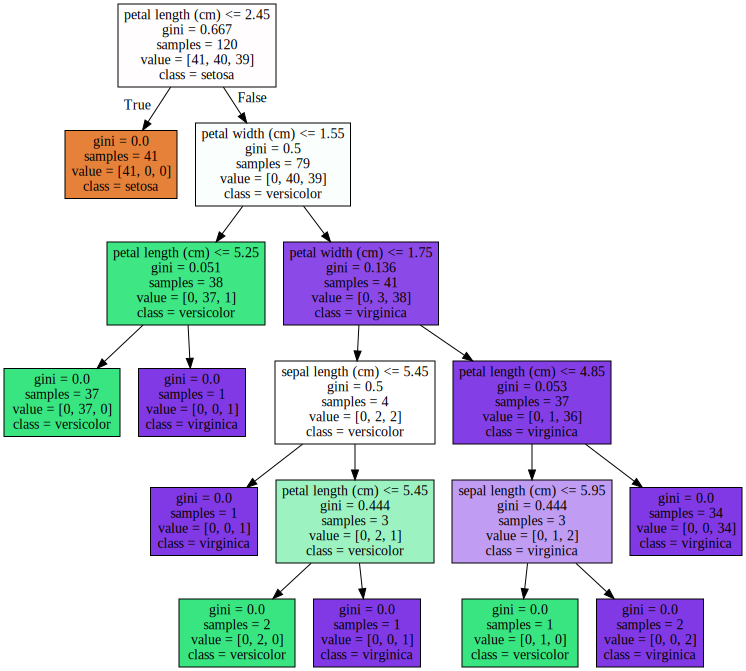

In [22]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("./tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances: 
 [0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


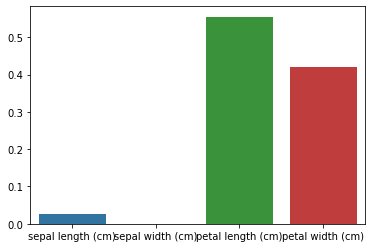

In [25]:
# feature-importances_ 속성을 사용하면 피쳐별로 중요도 값을 알 수 있다.

import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances: \n {0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_) :
    print('{0} : {1:.3f}'.format(name, value))
    
# 시각화
sns.barplot(x=iris_data.feature_names, y=dt_clf.feature_importances_)

#### 결정 트리 과적합(Overfitting)

결정 트리가 어떻게 학습 데이터를 분할해 예측을 수행하는 지와 이로 인한 과적합 문제를 시각화를 통해 알아보자. 사이킷런은 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록 make_classification() 함수를 제공한다.

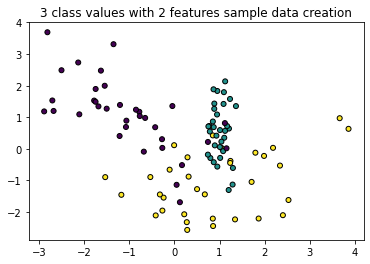

In [27]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 class values with 2 features sample data creation")

# 2차원 시각화를 위해 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                          n_classes=3, n_clusters_per_class=1, random_state=0)

# 시각화
plt.scatter(X_featues[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')

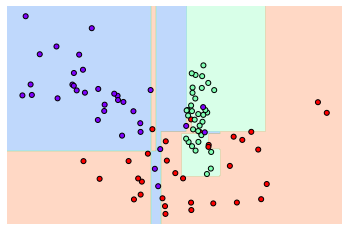

In [29]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

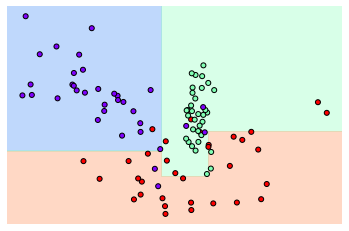

In [30]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

#### 결정 트리 실습 - 사용자 행동 인식 데이터 세트

해당 데이터는 30명에게 스마트폰 센서를 장착한 뒤 사람의 동작과 관련된 여러가지 피처를 수집한 데이터이다. 수집된 피처 세트를 기반으로 결정 트리를 이용해 어떠한 동작인지 예측해보자.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# featuers.txt 파일에는 피처 이름 index와 피처 명이 공빅으로 분리되어 있음
feature_name_df = pd.read_csv('./data/human_activity/features.txt', sep='\s+', 
                              header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출 (피처는 모두 561개)
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개마나 추출 : ', feature_name[:10])

전체 피처명에서 10개마나 추출 :  ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [35]:
feature_name_df

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [32]:
# 피처명을 보면 인체의 움직임과 관련된 속성의 평균/표준편차가 X,Y,Z 값으로 되어 있음을 유추할 수 있다.
# 피처명을 가지는 DataFrame을 이용해 데이터 파일을 데이터 세트 DataFrame에 로딩하기 전에 유의해야 할 부분이 있다.
# 위에서 피처명을 가지고 있는 features.txt 파일은 중복된 피처명을 가지고 있다. 이를 이용해 데이터 파일을 
# 데이터 세트 DataFrame에 로드하면 오류가 발생한다.
# 중복된 피처명에 대해서는 원본 피처명에 _1, _2 등을 추가로 부여해 변경한 뒤에 이를 이용해 데이터를 로드하자.
# 먼저 중복된 핖처명이 얼마나 있는지 알아보자.

feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [33]:
# 중복된 피처명에 대해서 이름을 변경해 새로운 피어명을 가지는 DataFrame을 반환하는 함수를 생성하자.

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [37]:
import pandas as pd


def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./data/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./data/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./data/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./data/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./data/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [38]:
print("## 학습 피처 데이터셋 info()")
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [39]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [41]:
# 최적의 하이퍼 파라미터 찾기

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  2.4min finished


GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [43]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [45]:
# 이번에는 별도의 테스트 데이터 세트에서 결정 트리의 정확도를 측정

max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]

for depth in max_depths :
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도 : {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도 : 0.8558
max_depth = 8 정확도 : 0.8707
max_depth = 10 정확도 : 0.8673
max_depth = 12 정확도 : 0.8646
max_depth = 16 정확도 : 0.8575
max_depth = 20 정확도 : 0.8548
max_depth = 24 정확도 : 0.8548


In [46]:
# max_depth와 min_samples_split을 같이 변경하면서 정확도 성능 튜닝

params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.3min finished


GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [47]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


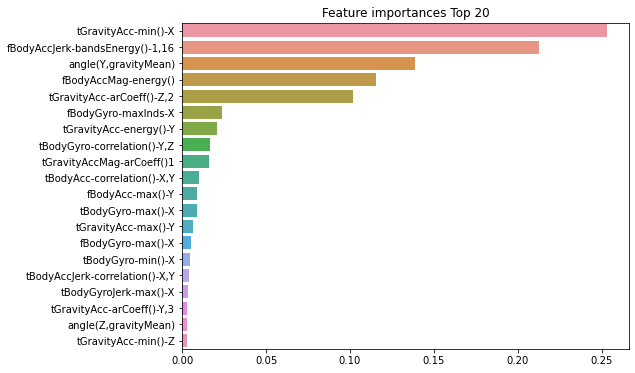

In [48]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

### 3. 앙상블 학습

#### 앙상블 학습 개요

앙상블 학습(Ensemble Learning)을 통한 분류는 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법을 말한다.
앙상블 학습의 목표는 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것이다.

이미지, 영상, 음성 드으이 비정형 데이터의 분류는 딥러닝이 뛰어난 성능을 보이고 있지만, 대부분의 정형 데이터 분류 시에는 앙상블이 뛰어난 성능을 나타내고 있다. 
앙상블의 대표격인 랜덤 포레스트와 그래디언트 부스팅은 뛰어난 성능과 쉬운 사용, 다양한 활용도로 인해 많이 애용되었다. 또 연구가 계속 이어져 새로운 알고리즘의 개발이 가속화되는 중이다.
XGBoost, LightGBM, Stacking 등 다양한 유형의 앙상블이 머신러닝의 선도 알고리즘으로 인기를 모으고 있으며 이를 한 두개만 잘 알고 있어도 예측 성능이 뛰어난 모델을 쉽게 만들 수 있다.

앙상블 학습의 유형은 전통적으로 보팅(Voting), 배깅(Bagging), 부스팅(Boosting) 세 가지로 나뉘며 그 외에도 스태킹을 포함한 다양한 앙상블 방법이 있다.

보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식이며 차이점은 보팅의 경우 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고, 배깅의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행하는 것이다. 이 때 데이터 중첩은 허용된다. 대표적인 배깅 박식이 랜덤 포레스트 알고리즘이다. 
부스팅은 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에서는 가중치를 부여하면서 학습과 예측을 진행한다.

#### 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)

보팅 방법에는 두 가지 방법이 있다.

- 하드 보팅 : 다수결 원칙과 비슷. 예측한 결괏값들 중 다수의 분류기가 결정한 에측값을 최종 보팅 결과갓으로 산정
- 소프트 보팅 : 분류기들의 레이블 값 결정 확률을 모두 더하야 이를 평균해서 이들 중 가장 확률이 높은 레이블 값을 최종 보팅 결괏값으로 산정 (일반적으로 더 많이 이용)

#### 보팅 분류기(Voting Classifier)

사이킷런은 보팅 방식의 앙상블을 구현한 VotingClassifier 클래스를 제공한다.

이를 이용해 위스콘신 유방암 데이터 세트를 예측 분석해보자. 로지스틱 회귀와 KNN 기반으로 보팅 분류기를 만들어 보자.

In [49]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [50]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' ) #voting 기본은 hard이다.

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


항상 보팅 분류기의 성능이 더 좋은 것은 아니며 단일 분류기의 성능이 보팅 했을 때 보다 더 높을 수 있다.
그럼에도 불구하고 보팅을 포함한 배깅고 부스팅 등의 앙상블 방법은 전반적으로 단일 ML 알고리즘보다 뛰어난 성능을 보이는 경우가 많다. (유연성이 증가하기 때문)
ML 모델의 성능은 이렇게 다양한 테스트 데이터에 의해 검증되므로 어떻게 높은 유연성을 가지고 현실에 대처할 수 있는가가 ML의 중요한 평가 요소가 된다. 